In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os
from time import gmtime, strftime


def xavier_init(size):
    in_dim = size[0]
    xavier_stddev = 1. / tf.sqrt(in_dim / 2.)
    return tf.random_normal(shape=size, stddev=xavier_stddev)


X = tf.placeholder(tf.float32, shape=[None, 784])

D_W1 = tf.Variable(xavier_init([784, 128]))
D_b1 = tf.Variable(tf.zeros(shape=[128]))

D_W2 = tf.Variable(xavier_init([128, 1]))
D_b2 = tf.Variable(tf.zeros(shape=[1]))

theta_D = [D_W1, D_W2, D_b1, D_b2]


Z = tf.placeholder(tf.float32, shape=[None, 100])

G_W1 = tf.Variable(xavier_init([100, 128]))
G_b1 = tf.Variable(tf.zeros(shape=[128]))

G_W2 = tf.Variable(xavier_init([128, 784]))
G_b2 = tf.Variable(tf.zeros(shape=[784]))

theta_G = [G_W1, G_W2, G_b1, G_b2]


def sample_Z(m, n):
    return np.random.uniform(-1., 1., size=[m, n])


def generator(z):
    G_h1 = tf.nn.relu(tf.matmul(z, G_W1) + G_b1)
    G_log_prob = tf.matmul(G_h1, G_W2) + G_b2
    G_prob = tf.nn.sigmoid(G_log_prob)

    return G_prob


def discriminator(x):
    D_h1 = tf.nn.relu(tf.matmul(x, D_W1) + D_b1)
    D_logit = tf.matmul(D_h1, D_W2) + D_b2
    D_prob = tf.nn.sigmoid(D_logit)

    return D_prob, D_logit


def plot(samples):
    fig = plt.figure(figsize=(8, 2))
    gs = gridspec.GridSpec(2, 8)
    gs.update(wspace=0.05, hspace=0.05)

    for i, sample in enumerate(samples):
        ax = plt.subplot(gs[i])
        plt.axis('off')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_aspect('equal')
        plt.imshow(sample.reshape(28, 28), cmap='Greys_r')

    return fig


G_sample = generator(Z)
D_real, D_logit_real = discriminator(X)
D_fake, D_logit_fake = discriminator(G_sample)

# D_loss = -tf.reduce_mean(tf.log(D_real) + tf.log(1. - D_fake))
# G_loss = -tf.reduce_mean(tf.log(D_fake))

# Alternative losses:
# -------------------
D_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=D_logit_real, labels=tf.ones_like(D_logit_real)))
D_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=D_logit_fake, labels=tf.zeros_like(D_logit_fake)))
D_loss = D_loss_real + D_loss_fake
G_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=D_logit_fake, labels=tf.ones_like(D_logit_fake)))

D_solver = tf.train.AdamOptimizer().minimize(D_loss, var_list=theta_D)
G_solver = tf.train.AdamOptimizer().minimize(G_loss, var_list=theta_G)

mb_size = 128
Z_dim = 100

mnist = input_data.read_data_sets('../../MNIST_data', one_hot=True)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

if not os.path.exists('../]data/GAN_pics/'):
    os.makedirs('../]data/GAN_pics/')

for it in range(100000):
    if it == 50000:
        samples = sess.run(G_sample, feed_dict={Z: sample_Z(16, Z_dim)})
    
        fig = plot(samples)
        figname = '../]data/GAN_pics/{}.png'.format(strftime("%m-%d_%H:%M:%S", gmtime()))
        plt.savefig(figname, bbox_inches='tight')
        plt.close(fig)

    X_mb, _ = mnist.train.next_batch(mb_size)

    _, D_loss_curr = sess.run([D_solver, D_loss], feed_dict={X: X_mb, Z: sample_Z(mb_size, Z_dim)})
    _, G_loss_curr = sess.run([G_solver, G_loss], feed_dict={Z: sample_Z(mb_size, Z_dim)})

    if it % 1000 == 0:
        print('Iter: {}'.format(it))
        print('D loss: {:.4}'. format(D_loss_curr))
        print('G_loss: {:.4}'.format(G_loss_curr))
        print()

Extracting ../../MNIST_data/train-images-idx3-ubyte.gz
Extracting ../../MNIST_data/train-labels-idx1-ubyte.gz
Extracting ../../MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../../MNIST_data/t10k-labels-idx1-ubyte.gz
Iter: 0
D loss: 1.345
G_loss: 2.835

Iter: 1000
D loss: 0.008279
G_loss: 8.882

Iter: 2000
D loss: 0.007269
G_loss: 7.919

Iter: 3000
D loss: 0.02655
G_loss: 6.665

Iter: 4000
D loss: 0.09383
G_loss: 5.329

Iter: 5000
D loss: 0.3489
G_loss: 4.742

Iter: 6000
D loss: 0.2805
G_loss: 5.725

Iter: 7000
D loss: 0.6084
G_loss: 4.151

Iter: 8000
D loss: 0.3338
G_loss: 4.148

Iter: 9000
D loss: 0.4542
G_loss: 3.531

Iter: 10000
D loss: 0.6875
G_loss: 3.318

Iter: 11000
D loss: 0.8915
G_loss: 2.642

Iter: 12000
D loss: 0.6995
G_loss: 3.09

Iter: 13000
D loss: 0.5893
G_loss: 2.283

Iter: 14000
D loss: 0.6485
G_loss: 2.508

Iter: 15000
D loss: 0.5707
G_loss: 2.608

Iter: 16000
D loss: 0.7081
G_loss: 2.622

Iter: 17000
D loss: 0.9328
G_loss: 2.312

Iter: 18000
D loss: 0.7952
G_loss: 

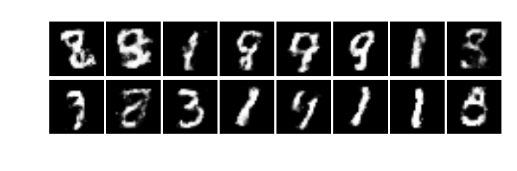

In [7]:
import matplotlib.image as mpimg
img=mpimg.imread(figname)
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()